# **TITANIC - MACHINE LEARNING FROM DISASTER**

https://www.kaggle.com/competitions/titanic

In [183]:
# Common libraries.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

---

## **1. LOOK AT THE DATASET:**

In [289]:
train_set = pd.read_csv("data/train.csv")
test_set = pd.read_csv("data/test.csv")

In [185]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [187]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [188]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing values in `Sex`, `Cabin`, `Embarked` and `Fare`.

In [189]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
print((train_set["Pclass"].value_counts(normalize=True) * 100).round(1).astype(str) + " %")

3    55.1 %
1    24.2 %
2    20.7 %
Name: Pclass, dtype: object


In [191]:
print((train_set["Sex"].value_counts(normalize=True) * 100).round(1).astype(str) + " %")

male      64.8 %
female    35.2 %
Name: Sex, dtype: object


In [192]:
print((train_set["SibSp"].value_counts(normalize=True) * 100).round(1).astype(str) + " %")

0    68.2 %
1    23.5 %
2     3.1 %
4     2.0 %
3     1.8 %
8     0.8 %
5     0.6 %
Name: SibSp, dtype: object


In [193]:
print((train_set["Parch"].value_counts(normalize=True) * 100).round(1).astype(str) + " %")

0    76.1 %
1    13.2 %
2     9.0 %
5     0.6 %
3     0.6 %
4     0.4 %
6     0.1 %
Name: Parch, dtype: object


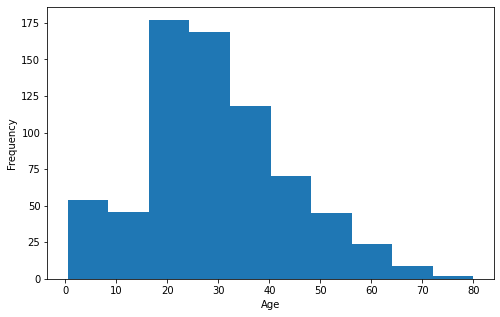

In [194]:
# Let's have a look on age distribution
plt.figure(figsize=(8, 5))
train_set["Age"].plot.hist()
plt.xlabel("Age")
plt.show()

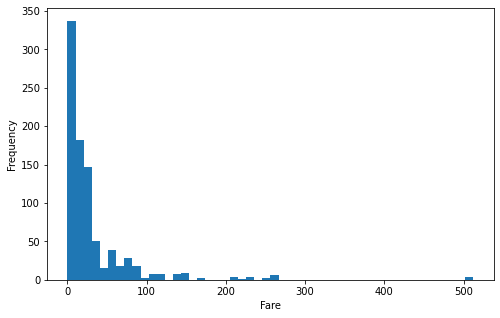

In [195]:
# And fare.
plt.figure(figsize=(8, 5))
train_set["Fare"].plot.hist(bins=50)
plt.xlabel("Fare")
plt.show()

In [196]:
# Let's have a look on correlations.
corr = train_set.corr()
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [197]:
print(train_set[["Survived", "Pclass"]].groupby(["Pclass"]).mean().sort_values(by="Survived", ascending=False))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [198]:
print(train_set[["Survived", "Sex"]].groupby(["Sex"]).mean().sort_values(by="Survived", ascending=False))

        Survived
Sex             
female  0.742038
male    0.188908


In [290]:
# Let's create a copy of the train set.
train_set_copy = train_set.copy()

In [291]:
# Let's remove "Survived" feature from train set and use it as label.
train_labels = train_set["Survived"]
train_set.drop("Survived", axis=1, inplace=True)

# And set passenger id as the df index.
train_set.set_index("PassengerId", inplace=True)
test_set.set_index("PassengerId", inplace=True)

## **2. FEATURE ENGINEERING:**

In [201]:
# Let's make a age bucket for children and adults.
train_set_copy["AgeBucket"] = pd.cut(train_set_copy["Age"], bins=[0., 15.,  np.inf], labels=["child", "adult"])
train_set_copy[["AgeBucket", "Survived"]].groupby(["AgeBucket"]).mean().sort_values(by="AgeBucket")

,Survived
AgeBucket,
child,0.590361
adult,0.381933


In [202]:
# Similarly, let's make a Fare Bucket.
train_set_copy["FareBucket"] = pd.cut(train_set_copy["Fare"], bins=[-0.1, 30., np.inf], labels=["cheap", "expensive"])
train_set_copy[["FareBucket", "Survived"]].groupby(["FareBucket"]).mean().sort_values(by="FareBucket")

,Survived
FareBucket,
cheap,0.313546
expensive,0.581197


In [203]:
# We will create a new feature - IsAlone (indicating if the passenger was alone or had a family).
# For this we need relatives onboard.
train_set_copy["Relatives"] = train_set_copy["SibSp"] + train_set_copy["Parch"]
train_set_copy[["Relatives", "Survived"]].groupby(["Relatives"]).mean().sort_values(by="Survived", ascending=False)

,Survived
Relatives,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [204]:
train_set_copy["IsAlone"] = (train_set_copy["Relatives"] == 0)
train_set_copy[["IsAlone", "Survived"]].groupby(["IsAlone"]).mean().sort_values(by="IsAlone")

,Survived
IsAlone,
False,0.505650
True,0.303538


In [205]:
# We can use the Name feature for extracting titles of passengers, due to the Name feature has a lot of unique values.
train_set_copy["Title"] = train_set_copy["Name"].str.extract(" ([A-Za-z]+)\.") # Extract only title e.g. "Miss".
train_set_copy["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [206]:
# Replace uniqe titles with "Unique".
unique_titles = set(train_set_copy["Title"]).difference({"Mr", "Miss", "Mrs", "Master"})
train_set_copy["Title"] = train_set_copy["Title"].replace(unique_titles, "Unique")  # type: ignore
train_set_copy["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Unique     27
Name: Title, dtype: int64

In [207]:
train_set_copy[["Title", "Survived"]].groupby(["Title"]).mean().sort_values(by="Title")

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Unique,0.444444


---

## **3. PREPROCESSING:**

In [208]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, add_age_bucket=True, add_fare_bucket=True, add_is_alone=True,
                 add_title=True, remove_unecessary=True):
        self.add_age_bucket = add_age_bucket
        self.add_fare_bucket = add_fare_bucket
        self.add_is_alone = add_is_alone
        self.add_title = add_title
        self.remove_unecessary = remove_unecessary
    
    def fit(self, X, y=None):
        self.age_median_ = X["Age"].median()
        self.fare_median_ = X["Fare"].median()
        self.embarked_most_freq_ = X["Embarked"].mode()[0]  # It returns a Series.
        return self
    
    def transform(self, X):
        X["Age"] = X["Age"].fillna(self.age_median_)
        X["Fare"] = X["Fare"].fillna(self.fare_median_)
        X["Embarked"] = X["Embarked"].fillna(self.embarked_most_freq_)
        if self.add_age_bucket:
            X["AgeBucket"] = pd.cut(X["Age"], bins=[0., 15.,  np.inf], labels=["child", "adult"])
        if self.add_fare_bucket:
            X["FareBucket"] = pd.cut(X["Fare"], bins=[-0.1, 30., np.inf], labels=["cheap", "expensive"])
        if self.add_is_alone:
            X["IsAlone"] = (X["SibSp"] + X["Parch"] == 0)
        if self.add_title:
            X["Title"] = X["Name"].str.extract(" ([A-Za-z]+)\.")  # Extract only title e.g. "Miss".
            unique_titles = set(X["Title"]).difference({"Mr", "Miss", "Mrs", "Master"})
            X["Title"] = X["Title"].replace(unique_titles, "Unique")  # type: ignore
        if self.remove_unecessary:
            X.drop(["Age", "Fare", "Name", "Cabin", "Ticket", "SibSp", "Parch"], axis=1, inplace=True)
        return X
        

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

attr_pipeline = Pipeline([
    ("attr_imputer_transformer", AttributeImputer()),
])

cat_pipeline = Pipeline([
    ("cat_encoder", OrdinalEncoder()),
])

cat_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, ["Pclass", "Sex", "AgeBucket", "FareBucket", "IsAlone", "Title", "Embarked"]),
])

preproc_pipeline = Pipeline([
    ("attrs_pipline", attr_pipeline),
    ("cats_pipeline", cat_pipeline),
])

In [210]:
train_set_prepared = preproc_pipeline.fit_transform(train_set_copy)

In [211]:
df = pd.DataFrame(train_set_prepared, columns=preproc_pipeline[-1].get_feature_names_out())
df.head()

,cat__Pclass,cat__Sex,cat__AgeBucket,cat__FareBucket,cat__IsAlone,cat__Title,cat__Embarked
0,2.0,1.0,0.0,0.0,0.0,2.0,2.0
1,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,2.0,0.0,0.0,0.0,1.0,1.0,2.0
3,0.0,0.0,0.0,1.0,0.0,3.0,2.0
4,2.0,1.0,0.0,0.0,1.0,2.0,2.0


---

## **4. MODEL SELECTION:**

In [213]:
from sklearn.model_selection import cross_val_score

In [214]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, train_set_prepared, train_labels, cv=10)
forest_scores.mean()

0.812609238451935

In [215]:
forest_clf.fit(train_set_prepared, train_labels)

feature_importances = forest_clf.feature_importances_
feature_names = preproc_pipeline[-1].get_feature_names_out()
importances = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)  # type: ignore

for name, importance in importances:
    print(name, importance)

cat__Sex 0.3615514373925721
cat__Pclass 0.20999372038887382
cat__Title 0.2078513324587441
cat__Embarked 0.07388131987172947
cat__FareBucket 0.06316915169093958
cat__IsAlone 0.045647346485519304
cat__AgeBucket 0.037905691711621704


In [216]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_scores = cross_val_score(sgd_clf, train_set_prepared, train_labels, cv=10)
sgd_scores.mean()

0.7407615480649189

In [217]:
from sklearn.svm import LinearSVC

lin_svm_clf = LinearSVC(random_state=42)
lin_svm_scores = cross_val_score(lin_svm_clf, train_set_prepared, train_labels, cv=10)
lin_svm_scores.mean()

0.7856304619225968

In [218]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_scores = cross_val_score(svm_clf, train_set_prepared, train_labels, cv=10)
svm_scores.mean()

0.8080898876404495

In [219]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, train_set_prepared, train_labels, cv=10)
knn_scores.mean()

0.8069787765293384

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=30, learning_rate=0.5, random_state=42
)
ada_scores = cross_val_score(ada_clf, train_set_prepared, train_labels, cv=10)
ada_scores.mean()

0.7867915106117354

In [ ]:
from sklearn.linear_model import LogisticRegression

lin_reg_clf = LogisticRegression(random_state=42)
lin_reg_scores = cross_val_score(lin_reg_clf, train_set_prepared, train_labels, cv=10)
lin_reg_scores.mean()

In [285]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=1.,
                                     random_state=42)
gbc_scores = cross_val_score(gbc_clf, train_set_prepared, train_labels, cv=10)
gbc_scores.mean()

0.8260799001248438

In [283]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for the RandomizedSearchCV
param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 11),
    'subsample': [0.5, 0.7, 1.0],
}

gbc_clf = GradientBoostingClassifier(learning_rate=1)

# Create an instance of the RandomizedSearchCV
random_search = RandomizedSearchCV(gbc_clf, param_distributions=param_grid, 
                                   n_iter=100, cv=5, random_state=42)
random_search.fit(train_set_prepared, train_labels)
random_search.best_score_

0.8159688657334756

---

## **5. FINAL PREDICTIONS:**

In [292]:
test_set_prepared = preproc_pipeline.transform(test_set)

gbc_clf.fit(train_set_prepared, train_labels)
results = gbc_clf.predict(test_set_prepared)
df = pd.DataFrame({"PassengerId": test_set.index, "Survived": results})
df.set_index("PassengerId").to_csv("data/submission.csv")
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### **FINAL SCORE ON KAGGLE: 78%**